In [ ]:
#STEP 1: DATA COLLECTION
import pandas as pd 
import matplotlib.pyplot as plt

#STEP 2: DATA LOADING AND EXPLORATION
theData = pd.read_csv("owid-covid-data.csv")

print(theData.columns) #can comment this out
print(" ")

print(theData.head()) #can comment this out
print(" ")

print(theData.isnull().sum())
print(" ")

In [63]:
#STEP 3: DATA HANDLING

#filtering countries of interest
countries = ['Kenya', 'United States', 'India', 'South Africa', 'Congo', 'United Kingdom', 'Nigeria', 'Japan', 'Mexico', 'Australia']
filteredData = theData[theData['location'].isin(countries)]

#dropping rows with missing dates or critical values
filteredData= filteredData.dropna(subset=['date', 'total_cases', 'new_cases'])

#converting the 'date' column to date-time
filteredData['date'] = pd.to_datetime(filtered_data['date'])

#handling missing numeric values 
#filling in missing values in 'total_deaths' and 'new_deaths'
filteredData['total_deaths'] = filteredData['total_deaths'].interpolate()
filteredData['new_deaths'] = filteredData['new_deaths'].fillna(0)


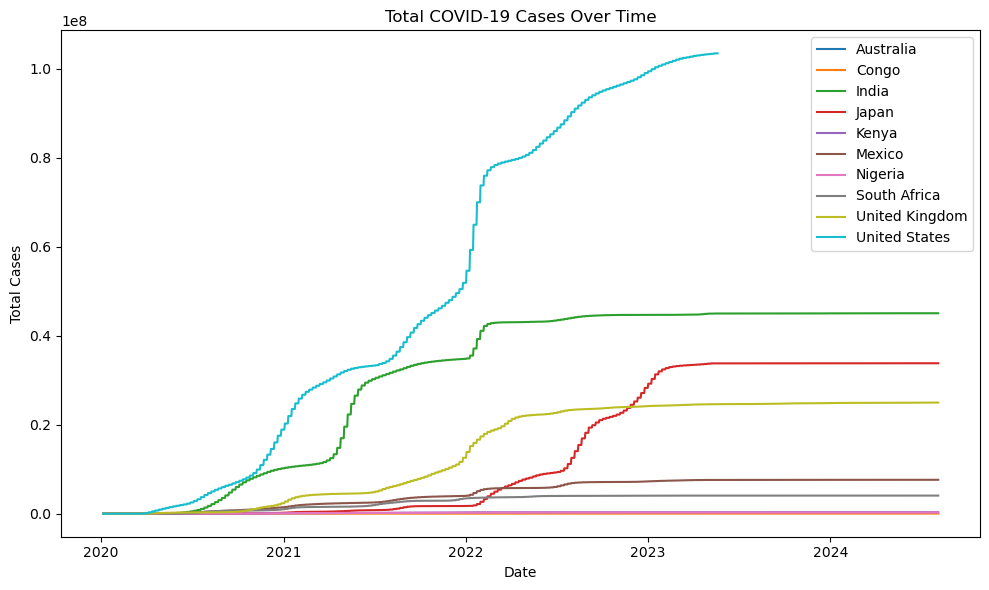

In [64]:
#STEP 4: EXPLORATORY DATA ANALYSIS

#PLOTTING TOTAL CASES OVER TIME  FOR SELECTED COUNTRIES
plt.figure(figsize=(10, 6))

for country in filteredData['location'].unique():
    country_data = filteredData[filteredData['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

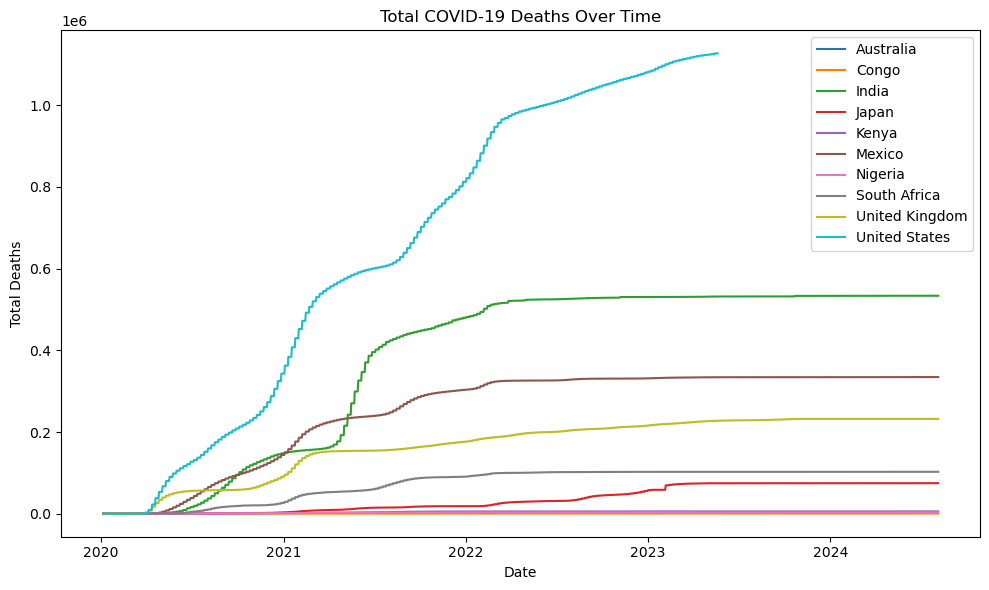

In [65]:
#PLOTTING TOTAL DEATHS OVER TIME
plt.figure(figsize=(10, 6))

for country in filteredData['location'].unique():
    country_data = filteredData[filteredData['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

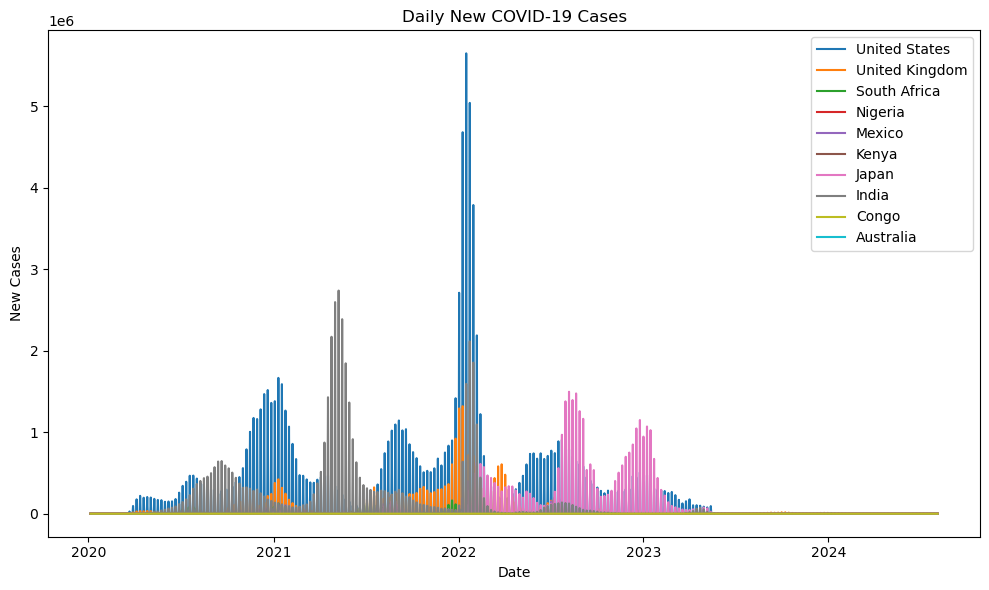

In [66]:
#COMPARE DAILY NEW CASES BETWEEN COUNTRIES
plt.figure(figsize=(10, 6))

locations = filteredData['location'].unique().tolist()

for country in reversed(locations): #in reverse so the one with less new cases can be visible
    country_data = filteredData[filteredData['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

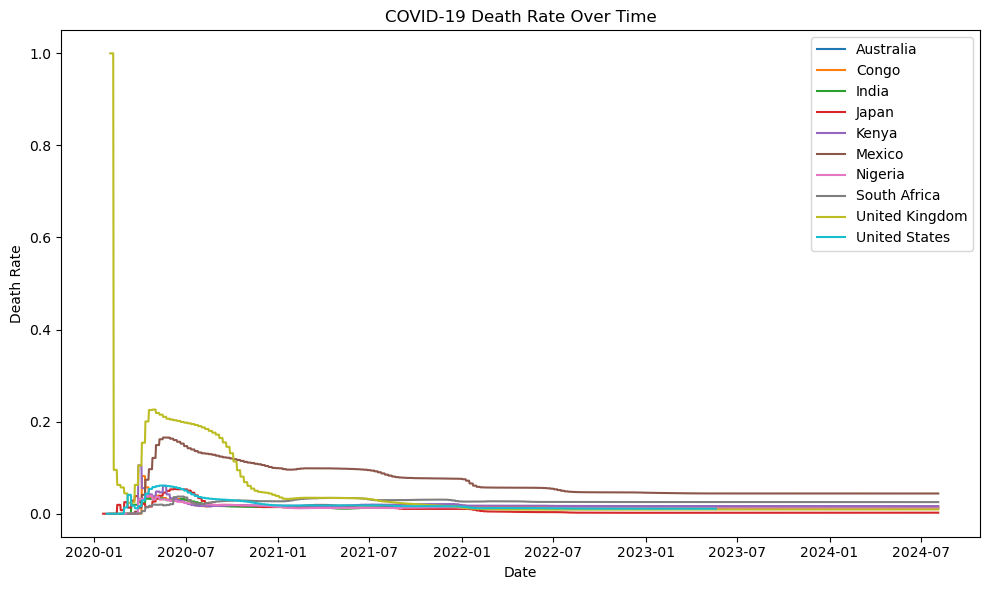

In [67]:
#CALCULATING THE DEATH RATE: total_deaths / total_cases
#adding a new column
filteredData['death_rate'] = filteredData['total_deaths'] / filteredData['total_cases']

plt.figure(figsize=(10, 6))

for country in filteredData['location'].unique():
    country_data = filteredData[filteredData['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

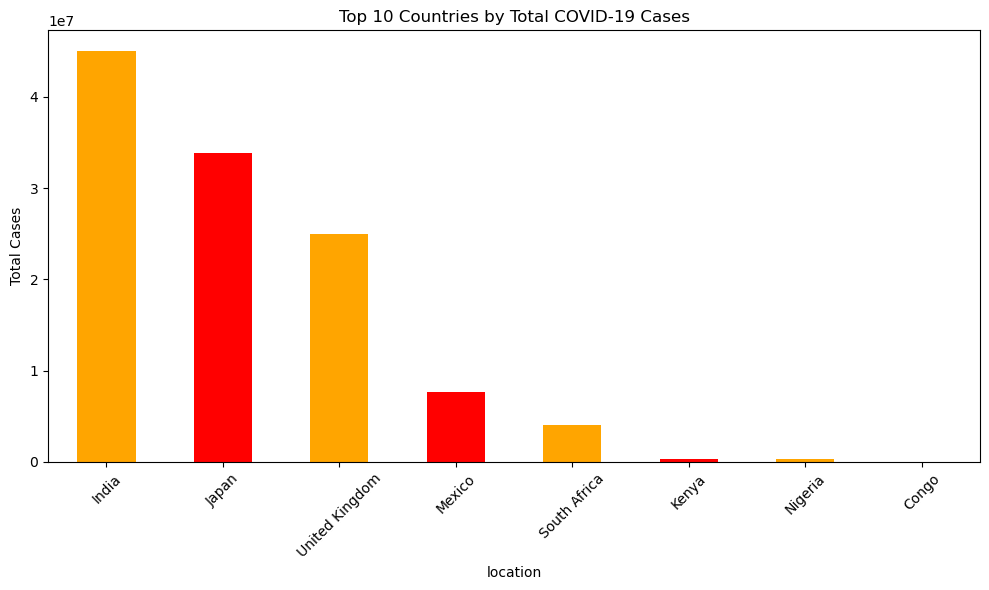

In [68]:
#BAR CHARTS - TOP COUNTRIES BY TOTAL CASES
latest_date = filteredData['date'].max()
latest_data = filteredData[filteredData['date'] == latest_date]

top_countries = latest_data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', figsize=(10, 6), color= ['orange', 'Red'])
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

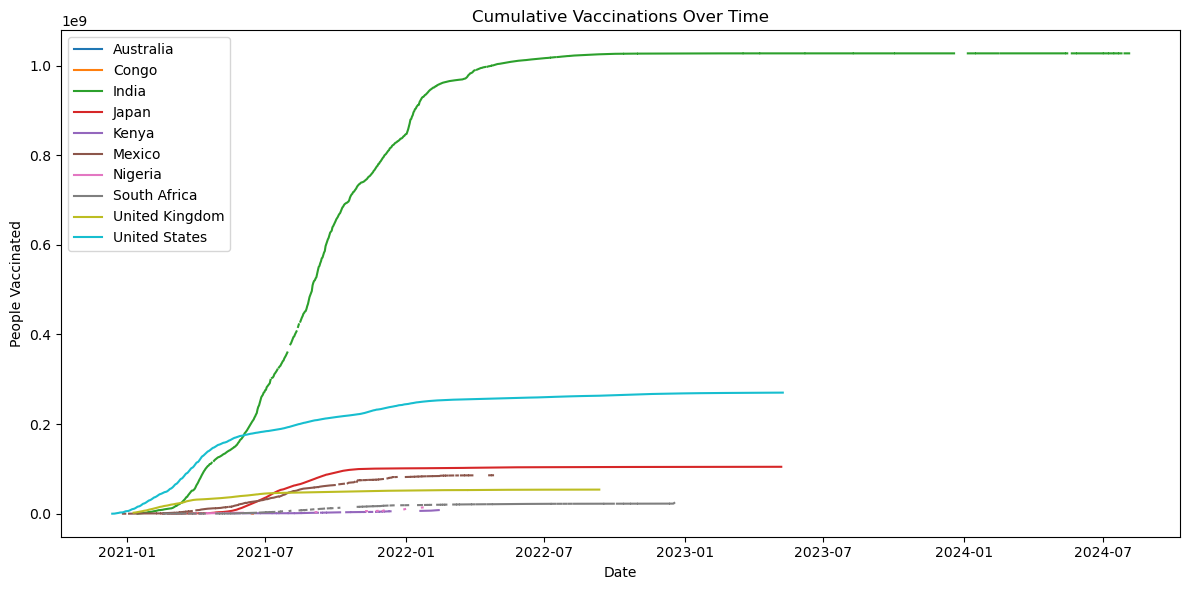

In [69]:
#STEP 5: VISUALIZING VACCINATION PROGRESS

#PLOTTING CUMULATIVE VACCINATIONS OVER TIME
plt.figure(figsize=(12, 6))

for country in filteredData['location'].unique():
    country_data = filteredData[filteredData['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)

plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.tight_layout()
plt.show()

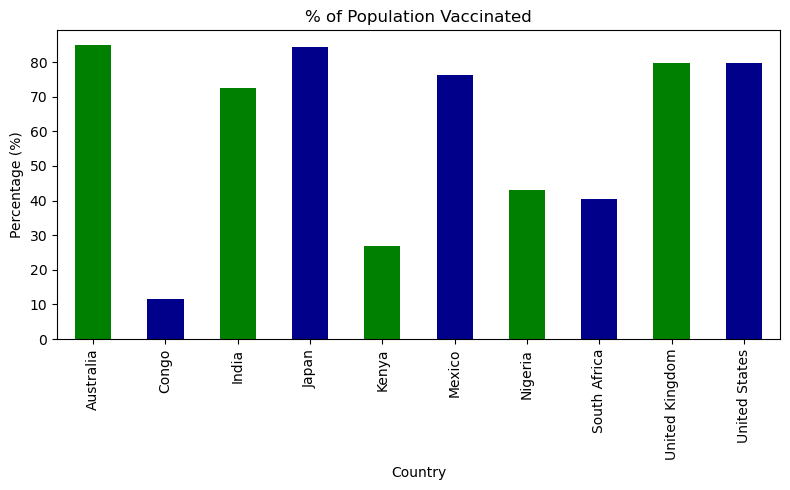

In [70]:
#COMPARE % VACCINATED POPULATION
#getting the latest data per country
latest_vax = filteredData.sort_values('date').groupby('location').last()

#filtering only countries of interest
latest_vax = latest_vax.loc[filteredData['location'].unique()]

#calculating % vaccinated
latest_vax['%_vaccinated'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100

#plotting
latest_vax['%_vaccinated'].plot(kind='bar', color= ['green', 'darkblue'], figsize=(8, 5))
plt.title("% of Population Vaccinated")
plt.ylabel("Percentage (%)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

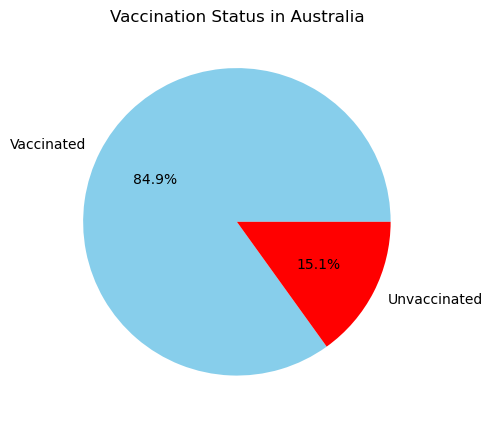

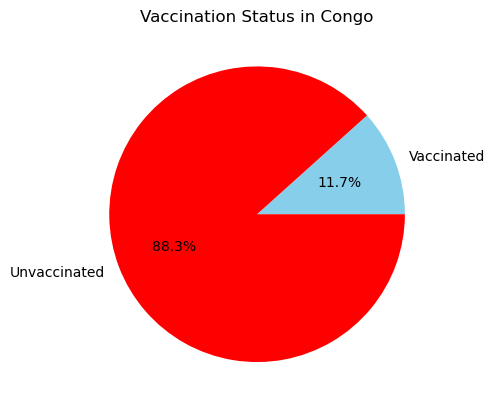

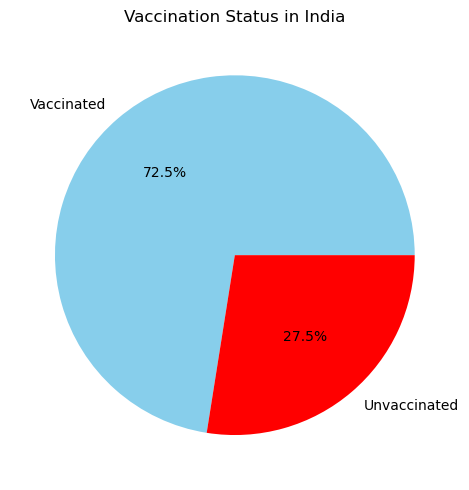

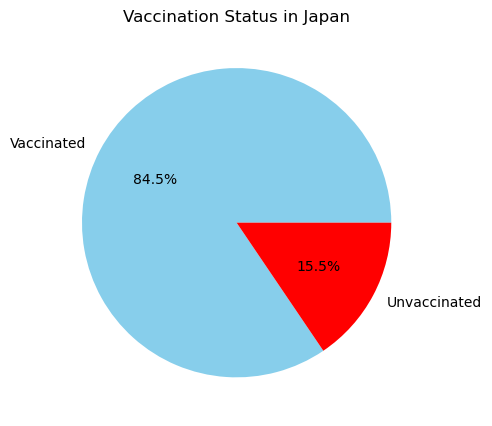

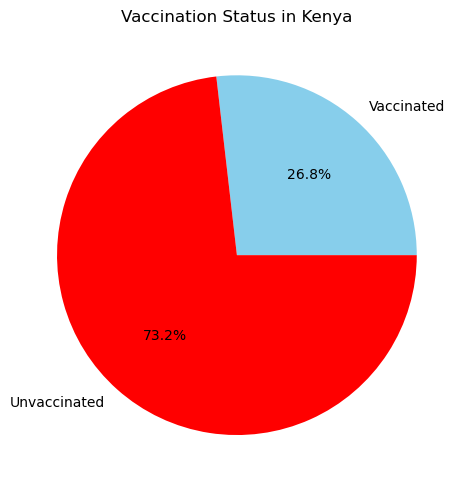

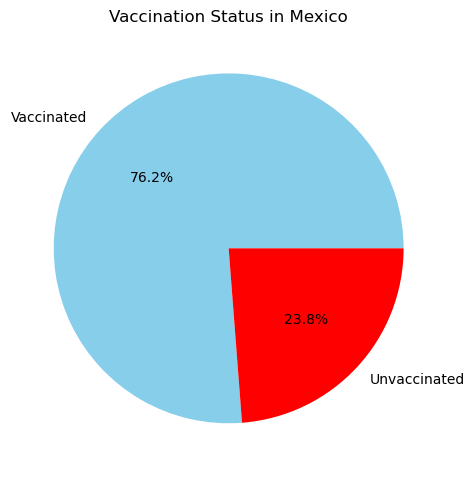

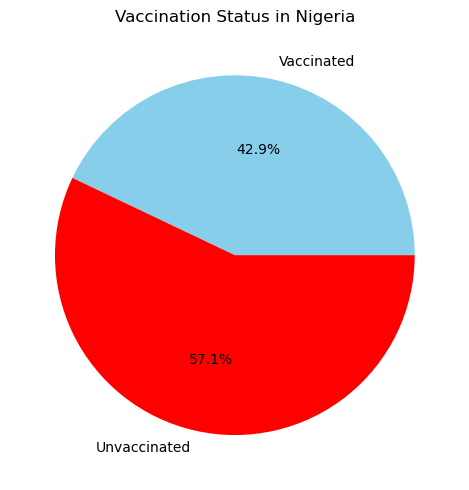

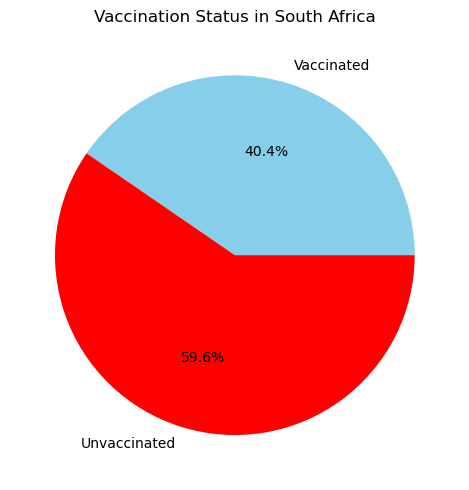

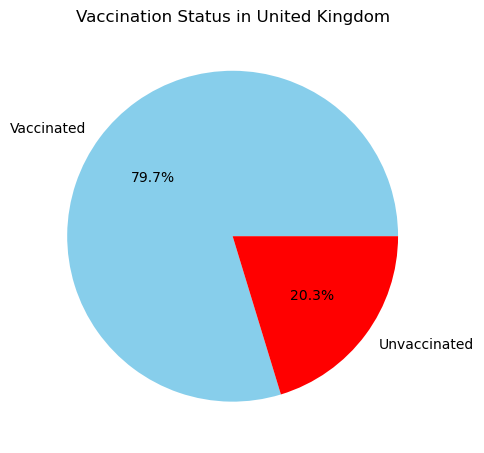

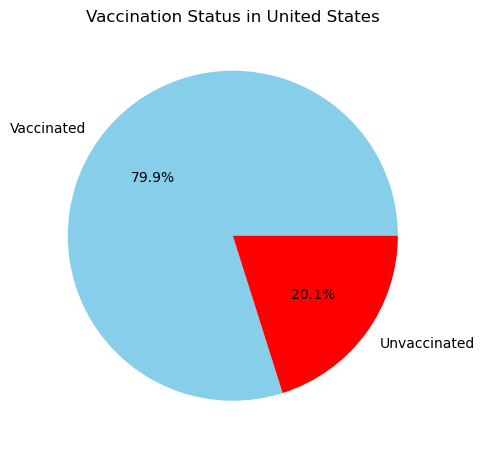

In [71]:
#PIE CHARTS FOR VACCINATED VS UN-VACCINATED 
for country in latest_vax.index:
    vaccinated = latest_vax.loc[country, 'people_vaccinated'] or 0
    population = latest_vax.loc[country, 'population'] or 0

    if population == 0:
        continue  # Still skip countries with zero population

    unvaccinated = population - vaccinated

    plt.figure(figsize=(5, 5))
    plt.pie([vaccinated, unvaccinated],
            labels=['Vaccinated', 'Unvaccinated'],
            colors=['skyblue', 'red'],
            autopct='%1.1f%%')
    plt.title(f"Vaccination Status in {country}")
    plt.tight_layout()
    plt.show()